<img SRC="imagen1.png"/>
<center><h1 Style="color:#008000">Analisis de Datos</h1></center>
<center><h5>Universidad Catro Carazo</h5></center>
</br>
<center><h6> II CUATRIMESTRE - 2022</h6></center>
</br>
<center><h7>  Nicole Cubero Calvo</h7></center>
</br>
<center><h7> PROYECTO FINAL: EL CAMBIO CLIMATICO Y EL TRANSPORTE </h7></center>
</br>
</br>
<p Style="text-aling: justify">El sector de transporte es una fuente creciente de emisiones de gases de efecto invernadero (GEI) y también altamente vulnerable a los efectos del cambio climático.Por lo tanto, en el presente desarrollo de analisis de datos me basare en la investigacion del medio de transporte que genera mas consumo de energia y de esta forma contamininacion que afecta al cambio climatico, y con los resultados que se obtengan se van a brindar recomendaciones para proponer medidas para disminuir el uso del mismo. </p>
<a  href="https://archive.ics.uci.edu/ml/index.php">Fuente de datos para el analisis</a>


<h2 Style="color:#FFD700"> 1.Carga y estandarizacion de los set de datos</h2>
<p> Que se hace en esta etapa?</p>

<o1>
    
    <1i>Importar las librerias necesarias</1i>
    <1i>Importar el o los set de datos </1i>
    <1i>Revisar los encabezados de los dataframes</1i>
    
    
</o1> 
<h3 style="color:#FF4500">1.1. Importar las librerias </h3>

In [1]:
import pandas as pd                 
import numpy as np                  
import matplotlib.pyplot as ptl 

<h3 Style ="color:#FF4500">1.2. Importar el set de datos </h3>


In [2]:
df_proyecto = pd.read_excel("proyecto.xlsx")

In [3]:
df_proyecto

,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Consumo final total,"152,180.00","150,782.00","154,301.00","156,069.00","157,966.00","164,134.00","173,415.00","176,835.00","176,935.00"
1,Consumo final (no energ.),"3,065.00","1,802.00","2,480.00","2,427.00","2,607.00","3,337.00","4,440.00","5,541.00","5,592.00"
2,Consumo final (energético),"149,115.00","148,979.00","151,821.00","153,642.00","155,359.00","160,797.00","168,975.00","171,294.00","171,342.00"
3,Residencial,"23,382.00","22,139.00","21,586.00","21,366.00","20,603.00","20,791.00","20,620.00","20,652.00","19,481.00"
4,1. Urbano,"10,514.00","11,513.00","11,950.00","12,090.00","12,606.00","13,197.00","13,459.00","13,687.00","13,521.00"
...,...,...,...,...,...,...,...,...,...,...
81,Agropecuario,"2,854.00","3,092.00","3,242.00","3,273.00","3,254.00","3,327.00","3,584.00","3,761.00","3,337.00"
82,Consumo no identificado (otros),953,"1,106.00",955,"1,008.00","1,281.00","1,346.00","1,364.00","1,493.00","1,430.00"
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_proyecto.shape

(86, 10)

In [5]:
df_proyecto.head(39)

,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Consumo final total,"152,180.00","150,782.00","154,301.00","156,069.00","157,966.00","164,134.00","173,415.00","176,835.00","176,935.00"
1,Consumo final (no energ.),"3,065.00","1,802.00","2,480.00","2,427.00","2,607.00","3,337.00","4,440.00","5,541.00","5,592.00"
2,Consumo final (energético),"149,115.00","148,979.00","151,821.00","153,642.00","155,359.00","160,797.00","168,975.00","171,294.00","171,342.00"
3,Residencial,"23,382.00","22,139.00","21,586.00","21,366.00","20,603.00","20,791.00","20,620.00","20,652.00","19,481.00"
4,1. Urbano,"10,514.00","11,513.00","11,950.00","12,090.00","12,606.00","13,197.00","13,459.00","13,687.00","13,521.00"
5,1.a Cocción,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
6,1.b Enfriamiento,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
7,1.c Iluminación,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
8,1.d Producción de calor,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
9,1.e Generación de fuerza,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"


In [6]:
df_proyecto.tail(10)

,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
76,6.b Generación de calor,-,-,-,-,0,0,0,0,0
77,6.c Iluminación,-,-,-,-,0,0,0,0,0
78,6.d Enfriamiento,-,-,-,-,0,0,0,0,0
79,6.e Generación de fuerza,-,-,-,-,0,0,0,0,0
80,6.f Otros,-,-,-,-,0,0,0,0,0
81,Agropecuario,"2,854.00","3,092.00","3,242.00","3,273.00","3,254.00","3,327.00","3,584.00","3,761.00","3,337.00"
82,Consumo no identificado (otros),953,"1,106.00",955,"1,008.00","1,281.00","1,346.00","1,364.00","1,493.00","1,430.00"
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_proyecto.describe()

,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,83,84,83,83,83,83,83,83,83,83
unique,79,38,39,39,39,39,39,39,39,39
top,1.c Iluminación,-,-,-,-,0,0,0,0,0
freq,2,42,41,41,41,41,41,41,41,41


In [8]:
df_proyecto.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Descripción  83 non-null     object
 1   2010         84 non-null     object
 2   2011         83 non-null     object
 3   2012         83 non-null     object
 4   2013         83 non-null     object
 5   2014         83 non-null     object
 6   2015         83 non-null     object
 7   2016         83 non-null     object
 8   2017         83 non-null     object
 9   2018         83 non-null     object
dtypes: object(10)
memory usage: 6.8+ KB


In [9]:
df_proyecto.columns

Index(['Descripción', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

<h4 Style="color:#FF4500"> 2. Unir datos en un dataframe </h4>

In [10]:
unionArchivos = [df_proyecto] 
dfproyecto = pd.concat(unionArchivos)
dfproyecto.shape 

(86, 10)

In [11]:
dfproyecto.head(83)

,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Consumo final total,"152,180.00","150,782.00","154,301.00","156,069.00","157,966.00","164,134.00","173,415.00","176,835.00","176,935.00"
1,Consumo final (no energ.),"3,065.00","1,802.00","2,480.00","2,427.00","2,607.00","3,337.00","4,440.00","5,541.00","5,592.00"
2,Consumo final (energético),"149,115.00","148,979.00","151,821.00","153,642.00","155,359.00","160,797.00","168,975.00","171,294.00","171,342.00"
3,Residencial,"23,382.00","22,139.00","21,586.00","21,366.00","20,603.00","20,791.00","20,620.00","20,652.00","19,481.00"
4,1. Urbano,"10,514.00","11,513.00","11,950.00","12,090.00","12,606.00","13,197.00","13,459.00","13,687.00","13,521.00"
...,...,...,...,...,...,...,...,...,...,...
78,6.d Enfriamiento,-,-,-,-,0,0,0,0,0
79,6.e Generación de fuerza,-,-,-,-,0,0,0,0,0
80,6.f Otros,-,-,-,-,0,0,0,0,0
81,Agropecuario,"2,854.00","3,092.00","3,242.00","3,273.00","3,254.00","3,327.00","3,584.00","3,761.00","3,337.00"


In [12]:
dftem=dfproyecto.iloc[19:38,0:10]

In [13]:
dftem.head(19)

,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
19,Transporte,"70,319.00","72,109.00","74,111.00","74,637.00","76,186.00","81,526.00","87,538.00","89,061.00","91,231.00"
20,Terrestre,"63,360.00","64,876.00","66,765.00","67,772.00","69,263.00","73,986.00","79,120.00","80,669.00","81,953.00"
21,1. Privado,"29,474.00","31,122.00","32,601.00","33,280.00","34,096.00","36,899.00","39,762.00","40,694.00","41,241.00"
22,1.a Automóviles,"20,541.00","19,422.00","19,899.00","19,828.00","20,253.00","21,883.00","23,502.00","24,012.00","24,251.00"
23,1.b Jeep,"4,599.00","7,702.00","8,615.00","9,363.00","9,627.00","10,423.00","11,268.00","11,556.00","11,778.00"
24,1.c Microbus familiar,"1,342.00","1,226.00","1,221.00","1,202.00","1,225.00","1,294.00","1,358.00","1,390.00","1,433.00"
25,1.d Motos,"2,992.00","2,773.00","2,866.00","2,886.00","2,991.00","3,299.00","3,634.00","3,735.00","3,778.00"
26,2. Público,"7,415.00","6,768.00","6,918.00","7,051.00","7,319.00","7,630.00","8,015.00","8,017.00","8,124.00"
27,2.a Microbus,"1,385.00","1,913.00","2,036.00","2,134.00","2,158.00","2,270.00","2,415.00","2,453.00","2,513.00"
28,2.b Autobus,"4,157.00","3,416.00","3,494.00","3,607.00","3,824.00","3,934.00","4,076.00","3,983.00","3,968.00"


<h5 Style="color:#FFD700">2. Manejo de valores faltantes o perdidos </h5>
<p> Que se hace en esta etapa?</p>

<ol>
    <li>Como se muestran los valores faltantes (null, espacio en blanco o vacio, o un signo de ?) y estandarizarlos (NaN(nom and number))</li>
    <li>Contar la cantidad de valores de NaN, faltantes por variables (columna) </li>
    <li>Analisis de imputacion(el promedio / se usa tambien procesos de MACHINE LEARNING) para el caso de los numericos </li>
    <li>Analisis de imputacion(con el valor mas frecuente de la columna) para el caso de los caracteres </li>
    <li> Eliminacion de filas y columnas con valores faltantes  </li> 
</ol> 

<h6 style="color:#FF4500">2.1. Identificar como se muestran los valores faltantes y estandarizarlos </h6>

In [14]:
dfproyecto.head(83)

,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Consumo final total,"152,180.00","150,782.00","154,301.00","156,069.00","157,966.00","164,134.00","173,415.00","176,835.00","176,935.00"
1,Consumo final (no energ.),"3,065.00","1,802.00","2,480.00","2,427.00","2,607.00","3,337.00","4,440.00","5,541.00","5,592.00"
2,Consumo final (energético),"149,115.00","148,979.00","151,821.00","153,642.00","155,359.00","160,797.00","168,975.00","171,294.00","171,342.00"
3,Residencial,"23,382.00","22,139.00","21,586.00","21,366.00","20,603.00","20,791.00","20,620.00","20,652.00","19,481.00"
4,1. Urbano,"10,514.00","11,513.00","11,950.00","12,090.00","12,606.00","13,197.00","13,459.00","13,687.00","13,521.00"
...,...,...,...,...,...,...,...,...,...,...
78,6.d Enfriamiento,-,-,-,-,0,0,0,0,0
79,6.e Generación de fuerza,-,-,-,-,0,0,0,0,0
80,6.f Otros,-,-,-,-,0,0,0,0,0
81,Agropecuario,"2,854.00","3,092.00","3,242.00","3,273.00","3,254.00","3,327.00","3,584.00","3,761.00","3,337.00"


In [15]:
dfproyecto.replace("0", np.nan, inplace = True)
dfproyecto.head(32)

,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Consumo final total,"152,180.00","150,782.00","154,301.00","156,069.00","157,966.00","164,134.00","173,415.00","176,835.00","176,935.00"
1,Consumo final (no energ.),"3,065.00","1,802.00","2,480.00","2,427.00","2,607.00","3,337.00","4,440.00","5,541.00","5,592.00"
2,Consumo final (energético),"149,115.00","148,979.00","151,821.00","153,642.00","155,359.00","160,797.00","168,975.00","171,294.00","171,342.00"
3,Residencial,"23,382.00","22,139.00","21,586.00","21,366.00","20,603.00","20,791.00","20,620.00","20,652.00","19,481.00"
4,1. Urbano,"10,514.00","11,513.00","11,950.00","12,090.00","12,606.00","13,197.00","13,459.00","13,687.00","13,521.00"
5,1.a Cocción,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
6,1.b Enfriamiento,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
7,1.c Iluminación,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
8,1.d Producción de calor,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
9,1.e Generación de fuerza,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"


<h3 Style="color:#FF4500">2.2 Contar los valores faltantes por columna </h3>

In [16]:
valoresPerdidos = dfproyecto.isnull()

In [17]:
valoresPerdidos.head(5)

,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [18]:
for column in valoresPerdidos.columns.values.tolist():
    print (column)
    print (valoresPerdidos[column].value_counts())
    print ("")

Descripción
False    83
True      3
Name: Descripción, dtype: int64

2010
False    84
True      2
Name: 2010, dtype: int64

2011
False    83
True      3
Name: 2011, dtype: int64

2012
False    83
True      3
Name: 2012, dtype: int64

2013
False    83
True      3
Name: 2013, dtype: int64

2014
False    83
True      3
Name: 2014, dtype: int64

2015
False    83
True      3
Name: 2015, dtype: int64

2016
False    83
True      3
Name: 2016, dtype: int64

2017
False    83
True      3
Name: 2017, dtype: int64

2018
False    83
True      3
Name: 2018, dtype: int64



<h3 Style="color:#FF4500">2.3 Imputar datos numericos  </h3> 

<h3 Style="color:#FF4500">2.4 Imputar datos tipo caracter   </h3>

In [ ]:
dfproyecto.head(5)

In [ ]:
dfproyecto["2018"].value_counts()

<h3 Style="color:#FF4500">2.5 Eliminar filas con valores faltantes  </h3>

In [ ]:
dfproyecto.dropna(subset=["2010"], axis=0, inplace=True)
dfproyecto.reset_index(drop=True, inplace=True)

In [ ]:
dfproyecto.dropna(subset=["2011"], axis=0, inplace=True)
dfproyecto.reset_index(drop=True, inplace=True)

In [ ]:
dfproyecto.dropna(subset=["2012"], axis=0, inplace=True)
dfproyecto.reset_index(drop=True, inplace=True)

In [ ]:
dfproyecto.dropna(subset=["2013"], axis=0, inplace=True)
dfproyecto.reset_index(drop=True, inplace=True)

In [ ]:
dfproyecto.dropna(subset=["2014"], axis=0, inplace=True)
dfproyecto.reset_index(drop=True, inplace=True)

In [ ]:
dfproyecto.dropna(subset=["2015"], axis=0, inplace=True)
dfproyecto.reset_index(drop=True, inplace=True)

In [ ]:
dfproyecto.dropna(subset=["2016"], axis=0, inplace=True)
dfproyecto.reset_index(drop=True, inplace=True)

In [ ]:
dfproyecto.dropna(subset=["2017"], axis=0, inplace=True)
dfproyecto.reset_index(drop=True, inplace=True)

In [ ]:
dfproyecto.dropna(subset=["2018"], axis=0, inplace=True)
dfproyecto.reset_index(drop=True, inplace=True)

In [ ]:
dfproyecto

<h5 Style="color:#FFD700"> 3.Estandarizacion de datos </h5>
<p> Que se hace con esta etapa? </p>

<ol> 
    <li>Verificar el dominio de las variables y se ajusta, si es necesario</li>
    <li>Convertir valores en funcion de la interpretacion</li>
    <li>Normalizar los datos para que sus valores queden entre 0 y 1</li>
    <li>Agrupar datos (Binning)</li>
    
</ol>

<h6 Style="color:#FF4500"> 3.1 Verificar el dominio de la variable </h6>



In [ ]:
dfproyecto.head(5)

In [ ]:
dfproyecto.dtypes

In [ ]:
dfproyecto["2010"] = dfproyecto["2010"].astype("object")

In [ ]:
dfproyecto.dtypes

<h5 Style="color:#FF4500">3.2 Convertir valores en funcion de su interpretacion </h5>

In [ ]:
dfproyecto.head(5)

<h5 Style="color:#FF4500">3.3 Normalizacion de los Datos</h5>

In [ ]:
dfproyecto.info()

In [ ]:
dfTemp=dfproyecto[["2010","2012","2014","2016","2018"]]
dfTemp.head(5)

In [ ]:
dfTemp=dfproyecto[["2010","2012","2014","2016","2018"]]
dfTemp.head(5)

<h3 Style="color:#FF4500"> 3.4Binning </h3>

In [ ]:
dfproyecto.head(3)

<h2 Style="color:#FFD700">4. Visualizacion de Datos </h2>
<p>Que se hace en esta etapa?</p>


<ol>
    <li>Verificar el dominio de las variables y se ajusta, si es necesario </li>
    <li>Responder las preguntas de Negocio </li>
    <li>Liberar conocimiento</li>
    <li>Generar informe al Negocio</li>
    
</ol>
    

In [107]:
dftem=dfproyecto.iloc[19:38,0:10]

In [20]:
dftem.head(19)

,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
19,Transporte,"70,319.00","72,109.00","74,111.00","74,637.00","76,186.00","81,526.00","87,538.00","89,061.00","91,231.00"
20,Terrestre,"63,360.00","64,876.00","66,765.00","67,772.00","69,263.00","73,986.00","79,120.00","80,669.00","81,953.00"
21,1. Privado,"29,474.00","31,122.00","32,601.00","33,280.00","34,096.00","36,899.00","39,762.00","40,694.00","41,241.00"
22,1.a Automóviles,"20,541.00","19,422.00","19,899.00","19,828.00","20,253.00","21,883.00","23,502.00","24,012.00","24,251.00"
23,1.b Jeep,"4,599.00","7,702.00","8,615.00","9,363.00","9,627.00","10,423.00","11,268.00","11,556.00","11,778.00"
24,1.c Microbus familiar,"1,342.00","1,226.00","1,221.00","1,202.00","1,225.00","1,294.00","1,358.00","1,390.00","1,433.00"
25,1.d Motos,"2,992.00","2,773.00","2,866.00","2,886.00","2,991.00","3,299.00","3,634.00","3,735.00","3,778.00"
26,2. Público,"7,415.00","6,768.00","6,918.00","7,051.00","7,319.00","7,630.00","8,015.00","8,017.00","8,124.00"
27,2.a Microbus,"1,385.00","1,913.00","2,036.00","2,134.00","2,158.00","2,270.00","2,415.00","2,453.00","2,513.00"
28,2.b Autobus,"4,157.00","3,416.00","3,494.00","3,607.00","3,824.00","3,934.00","4,076.00","3,983.00","3,968.00"


In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


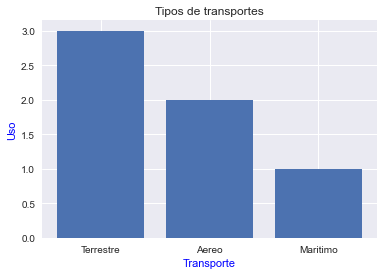

<Figure size 1080x1440 with 0 Axes>

In [140]:
x=("Terrestre","Aereo","Maritimo")
y=(3,2,1)

plt.bar(x,y)

plt.ylabel("Uso").set_color("#0000FF")
plt.xlabel("Transporte").set_color("#0000FF")

plt.title("Tipos de transportes")
plt.figure(figsize=(15,20))

plt.show()

Segun los datos del grafico anterior, se muestra que se realizo un estudio basado en el archivo obtenido en la pagina de SINAMEC, en el cual fue de mi interes el tema del transporte, ya que este es uno de los temas principales a mejorar en el cambio climatico, analizando asi el transporte Terrestre, Aereo y Maritimo, obteniendo como resultado que el mas utilizado es el primeramente mencionado.

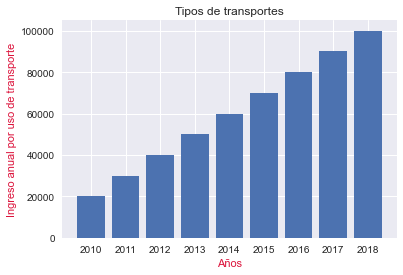

<Figure size 1080x1440 with 0 Axes>

In [129]:
x=("2010","2011","2012","2013","2014","2015","2016","2017","2018")
y=(20000,30000,40000,50000,60000,70000,80000,90000,100000)

plt.bar(x,y)

plt.ylabel("Ingreso anual por uso de transporte").set_color("#DC143C")
plt.xlabel("Años").set_color("#DC143C")

plt.title("Tipos de transportes")
plt.figure(figsize=(15,20))

plt.show()

Se concluye que el periodo en estudio sobre el uso del medio de transporte es del año 2010 al 2018, el cual refleja un crecimiento de forma ascendente con el pasar de los años, osea, aumentando el uso de transporte y generando mayor contaminacion climatica, ya que ninguno de estos transportes contribuyen con el ambiente.

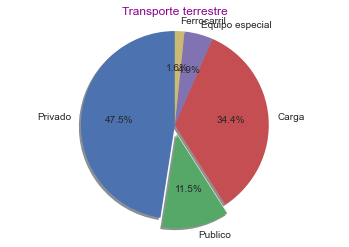

<Figure size 1080x1440 with 0 Axes>

In [138]:
labels = 'Privado', 'Publico', 'Carga','Equipo especial', 'Ferrocarril'
Uso = [29,7,21,3,1]
explode = (0, 0.1, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(Uso, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Transporte terrestre").set_color("#8B008B")
plt.figure(figsize=(15,20))

plt.show()

Basados en el transporte Terrestre se observa que existen varios tipos de transporte que generan mayor uso, empezando por el transporte privado, el de carga, transporte publico, equipo especial y finalizando por el Ferrocarril.

<h5 Style="color:#FFD700">5. Conclusion </h5>

Como conclusion final y dando respuesta a la pregunta principal del proyecto, la cual esta basada en ¿Que puedo hacer yo para contribuir con el cambio climatico?, aportaria que como usuarios de diferentes medios de transporte en especial el terrestre, realizar inversion en el servicio de trenes, metros, accesibilidad a la adquisicion de autos y buses electricos, que contribuyan y mejoren el uso del medio de transporte terrestre que es el de mayor consumo, para asi evitar la contaminacion ambiental por los tipos de gases y humo que generan estos mismos.

Ademas del incremento del teletrabajo para las personas trabajadoras que de esta forma reducirian el uso de vehiculos para trasladarse a su lugar de trabajo y tambien recomendar a las empresas que utilizan servicio de carga, valorar la posibilidad de que sus vehiculos sean electricos o mejorar la cantidad de veces que se utilizan estos medios de transporte para reducir la contaminacion. 